In [1]:
import pandas as pd
import os
from enum import Enum
import numpy as np
import scipy
from numpy import sqrt, sin, cos, tan, pi
from scipy.integrate import odeint
from scipy.interpolate import InterpolatedUnivariateSpline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import ticker, cm
from matplotlib import ticker
from scipy.optimize import minimize
from scipy.optimize import Bounds

In [38]:
density = 997
dynamicViscosity = 0.0008891
kinematicViscosity = 8.917*10**-7

class flowParameters():
    def __init__(self, outerRadius, innerOuterRatio, discSpacing, \
                 relativeTipTangential, relativeTipRadial, reynoldMS, profileN = 2):
        self.innerRadius = innerOuterRatio*outerRadius
        self.outerRadius = outerRadius
        self.innerOuterRatio = innerOuterRatio
        self.discSpacing = discSpacing

        self.relativeTipRadial = relativeTipRadial
        self.relativeTipTangential = relativeTipTangential
        self.reynoldMS = reynoldMS
        self.Fpo = (profileN + 1)/3

        self.omega = (kinematicViscosity/4*discSpacing)*(reynoldMS/relativeTipRadial)
        self.tipVelocity = self.omega*outerRadius
        self.vRadial = -self.tipVelocity*relativeTipRadial
        self.vTheta = self.relativeTipTangential*self.tipVelocity + self.tipVelocity

def bothODE(y,x,instance):
    y0,y1 = y

    nTerm = 3*instance.Fpo - 1 # article definition
    Vr0 = instance.vRadial/instance.tipVelocity

    firstSolution = -(2*nTerm + 1)/(nTerm + 1) + (8*(2*nTerm + 1)*x/instance.reynoldMS - 1/x)*y0
    secondSolution = (4*(nTerm + 1)/(2*nTerm + 1))*(1/x**3)*(Vr0**2 + (y0*x)**2) +\
                    4*y0 + 2*x + 32*(nTerm + 1)*(Vr0**2)/(x*instance.reynoldMS)
    return [firstSolution, secondSolution]

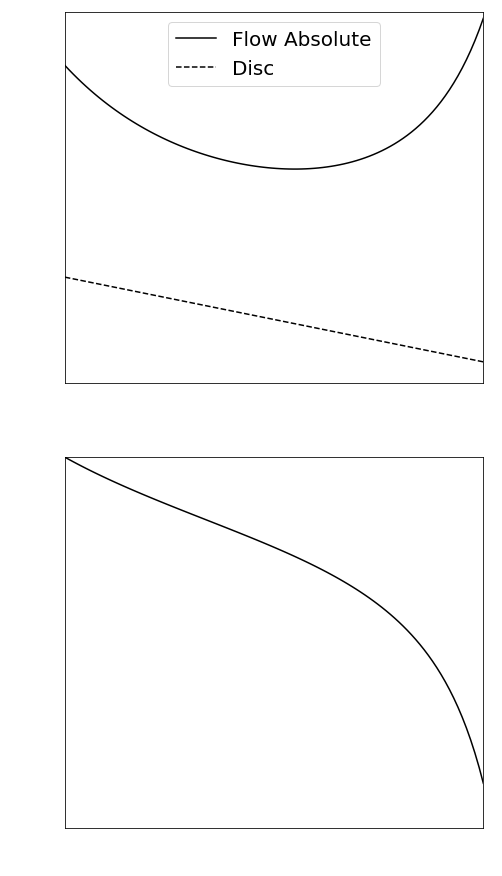

In [39]:
"""W0 = 2, Rem* = 10, radius ratio = 0.2, Vro = 0.05"""
testCase1 = flowParameters(0.5, 0.2, 0.0001, 2, 0.05, 10)

rs = np.linspace(1, testCase1.innerOuterRatio, 100)
sol = odeint(bothODE, [testCase1.relativeTipTangential, 0.0], rs, args=(testCase1,))

fig, ax = plt.subplots(2,1, figsize=(7.5,15))

ax[0].plot(rs, sol[:,0]+rs, label="Flow Absolute", color='black')
ax[0].plot(rs, rs, '--', label="Disc", color='black')
ax[0].set_ylim(bottom=0, top=3.5)
ax[0].set_xlim(left=0.2, right=1.0)
ax[0].set_xlabel('Radius Ratio', color='white', fontsize=15)
ax[0].set_ylabel('Tangential Velocity', color='white', fontsize=15)
ax[0].tick_params(axis='x', colors='white', labelsize=15)
ax[0].tick_params(axis='y', colors='white', labelsize=15)
ax[0].legend(fontsize=20)

ax[1].plot(rs, sol[:,1], label="", color='black')
ax[1].set_ylim(top=0, bottom=-25)
ax[1].set_xlim(left=0.2, right=1.0)
ax[1].set_xlabel('Radius Ratio', color='white', fontsize=15)
ax[1].set_ylabel('Presure Drop', color='white', fontsize=15)
ax[1].tick_params(axis='x', colors='white', labelsize=15)
ax[1].tick_params(axis='y', colors='white', labelsize=15)

ax[0].invert_xaxis()
ax[1].invert_xaxis()

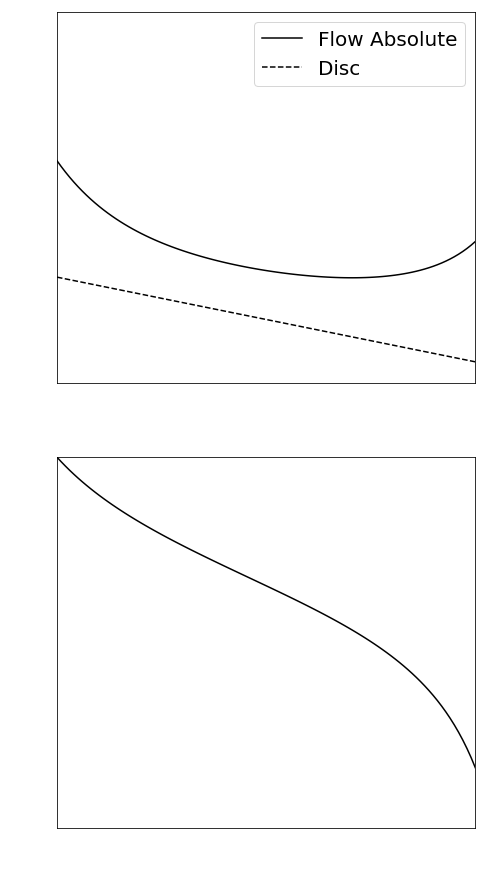

In [41]:
"""W0 = 1.1, Rem* = 5, radius ratio = 0.2, Vro = 0.05"""
testCase2 = flowParameters(0.5, 0.2, 0.0001, 1.1, 0.05, 5)

rs = np.linspace(1, testCase2.innerOuterRatio, 100)
sol = odeint(bothODE, [testCase2.relativeTipTangential, 0.0], rs, args=(testCase2,))

fig, ax = plt.subplots(2,1, figsize=(7.5,15))

ax[0].plot(rs, sol[:,0]+rs, label="Flow Absolute", color='black')
ax[0].plot(rs, rs, '--', label="Disc", color='black')
ax[0].set_ylim(bottom=0, top=3.5)
ax[0].set_xlim(left=0.2, right=1.0)
ax[0].set_xlabel('Radius Ratio', color='white', fontsize=15)
ax[0].set_ylabel('Tangential Velocity', color='white', fontsize=15)
ax[0].tick_params(axis='x', colors='white', labelsize=15)
ax[0].tick_params(axis='y', colors='white', labelsize=15)
ax[0].legend(fontsize=20)

ax[1].plot(rs, sol[:,1], label="", color='black')
ax[1].set_ylim(top=0, bottom=-6)
ax[1].set_xlim(left=0.2, right=1.0)
ax[1].set_xlabel('Radius Ratio', color='white', fontsize=15)
ax[1].set_ylabel('Presure Drop', color='white', fontsize=15)
ax[1].tick_params(axis='x', colors='white', labelsize=15)
ax[1].tick_params(axis='y', colors='white', labelsize=15)

ax[0].invert_xaxis()
ax[1].invert_xaxis()